In [8]:
from google.colab import files

uploaded = files.upload()

Saving train_ml.csv to train_ml.csv


In [10]:
import pandas as pd

df = pd.read_csv('train_ml.csv')

df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Income Stability'] = df['Income Stability'].fillna(df['Income Stability'].mode()[0])
df['Type of Employment'] = df['Type of Employment'].fillna(df['Type of Employment'].mode()[0])
df['Has Active Credit Card'] = df['Has Active Credit Card'].fillna(df['Has Active Credit Card'].mode()[0])
df['Property Location'] = df['Property Location'].fillna(df['Property Location'].mode()[0])


df['Income (USD)'] = df['Income (USD)'].fillna(df['Income (USD)'].mean())
df['Current Loan Expenses (USD)'] = df['Current Loan Expenses (USD)'].fillna(df['Current Loan Expenses (USD)'].mean())
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mean())
df['Credit Score'] = df['Credit Score'].fillna(df['Credit Score'].mean())
df['Property Age'] = df['Property Age'].fillna(df['Property Age'].mean())
df['Loan Sanction Amount (USD)'] = df['Loan Sanction Amount (USD)'].fillna(df['Loan Sanction Amount (USD)'].mean())


print("Missing values handled successfully!")
print(df.head())

print(df.isnull().sum())


Missing values handled successfully!
  Customer ID               Name Gender  Age  Income (USD) Income Stability  \
0     C-36995   Frederica Shealy      F   56   1933.050000              Low   
1     C-33999  America Calderone      M   32   4952.910000              Low   
2      C-3770      Rosetta Verne      F   65    988.190000             High   
3     C-26480         Zoe Chitty      F   65   2630.574417             High   
4     C-23459       Afton Venema      F   31   2614.770000              Low   

  Profession     Type of Employment    Location  Loan Amount Request (USD)  \
0    Working            Sales staff  Semi-Urban                   72809.58   
1    Working               Laborers  Semi-Urban                   46837.47   
2  Pensioner               Laborers  Semi-Urban                   45593.04   
3  Pensioner               Laborers       Rural                   80057.92   
4    Working  High skill tech staff  Semi-Urban                  113858.89   

   ...  Credit Scor

In [11]:
from sklearn.preprocessing import LabelEncoder


categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_cols)


label_encoder = LabelEncoder()
binary_cols = [col for col in categorical_cols if df[col].nunique() == 2]

for col in binary_cols:
    df[col] = label_encoder.fit_transform(df[col])

print("Label Encoded columns:", binary_cols)


multi_cat_cols = [col for col in categorical_cols if col not in binary_cols]

df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)

print("One-Hot Encoded columns:", multi_cat_cols)

Categorical columns: ['Customer ID', 'Name', 'Gender', 'Income Stability', 'Profession', 'Type of Employment', 'Location', 'Expense Type 1', 'Expense Type 2', 'Has Active Credit Card', 'Property Location']
Label Encoded columns: ['Gender', 'Income Stability', 'Expense Type 1', 'Expense Type 2']
One-Hot Encoded columns: ['Customer ID', 'Name', 'Profession', 'Type of Employment', 'Location', 'Has Active Credit Card', 'Property Location']


In [12]:
from sklearn.preprocessing import StandardScaler

# Step 1: Drop the target
X = df.drop('Loan Sanction Amount (USD)', axis=1)
y = df['Loan Sanction Amount (USD)']

# Step 2: Select only numeric columns for scaling
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
X_numeric = X[numeric_features]

# Step 3: Apply StandardScaler on numeric columns only
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# If you need it back as DataFrame:
X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_features)

# Optional: Add back categorical columns if needed (like for later ML pipeline)
categorical_cols = X.select_dtypes(include='object').columns
X_final = pd.concat([X_scaled_df, X[categorical_cols].reset_index(drop=True)], axis=1)


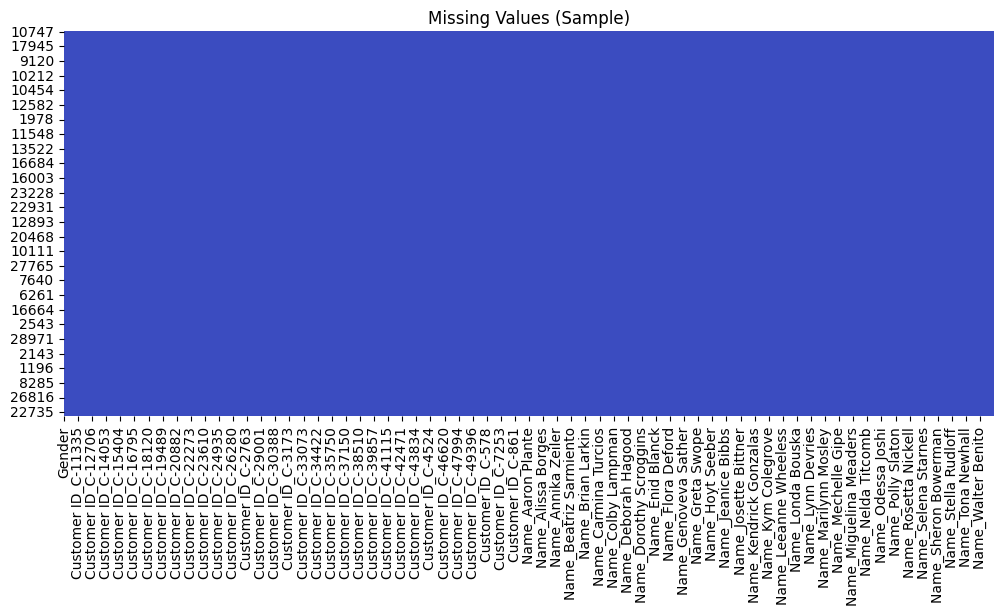

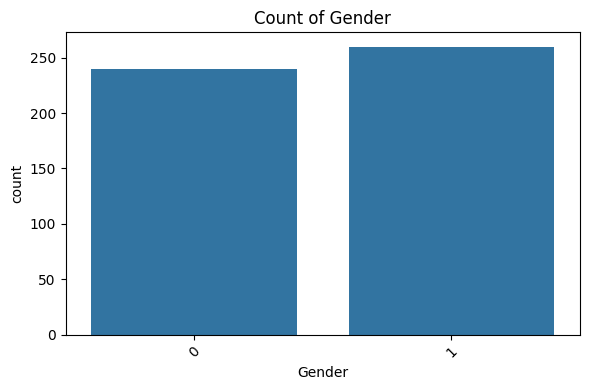

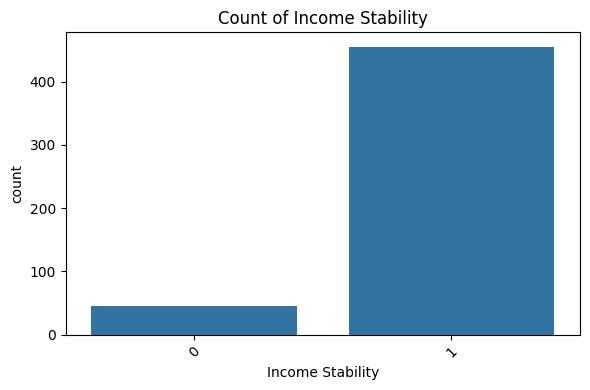

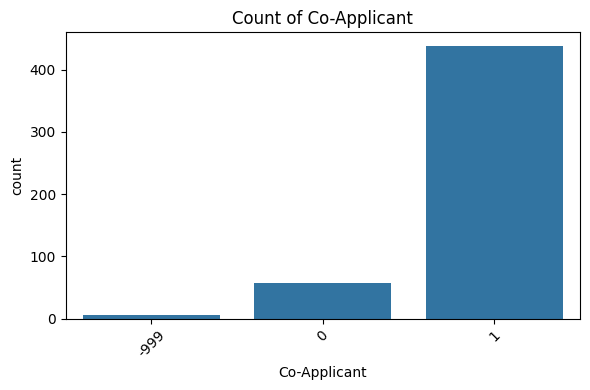

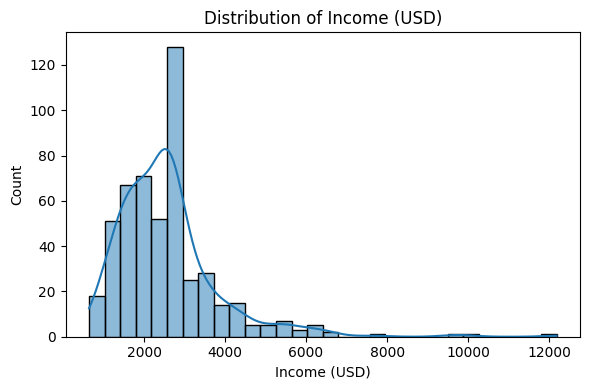

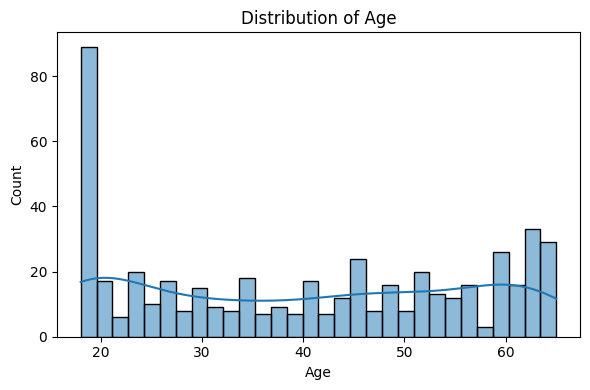

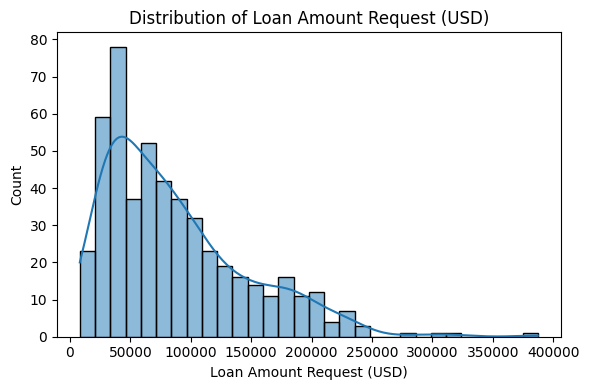

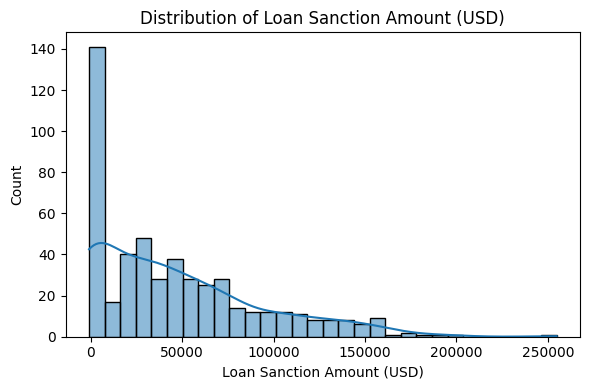

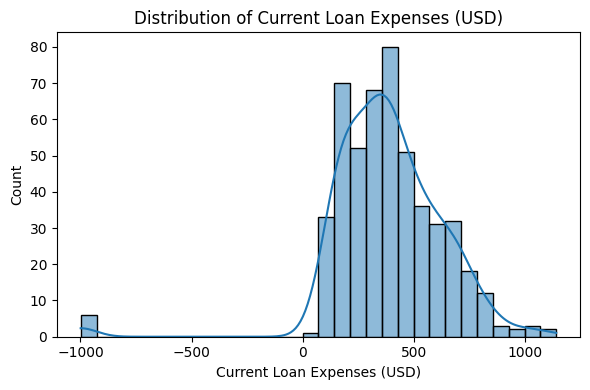

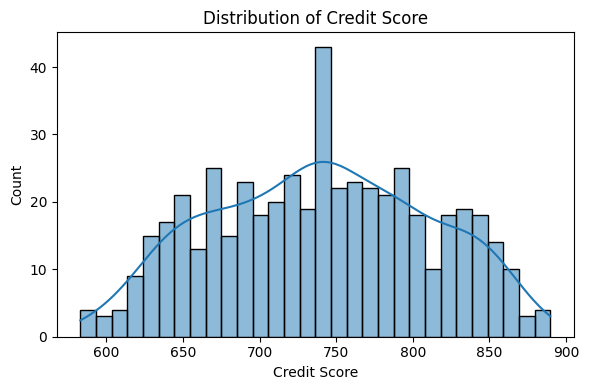

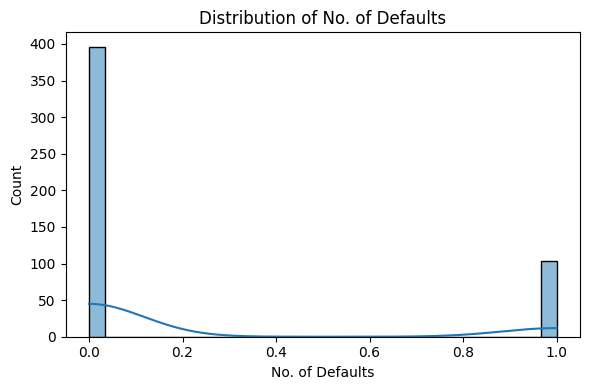

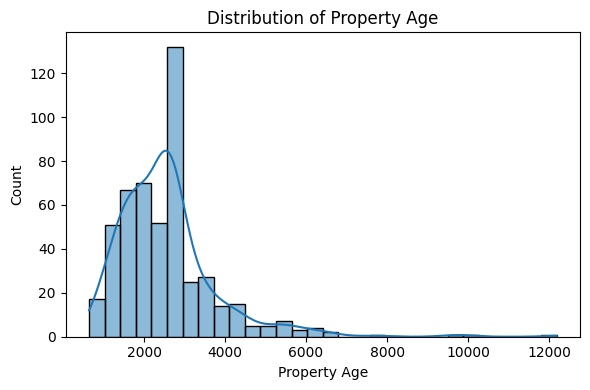

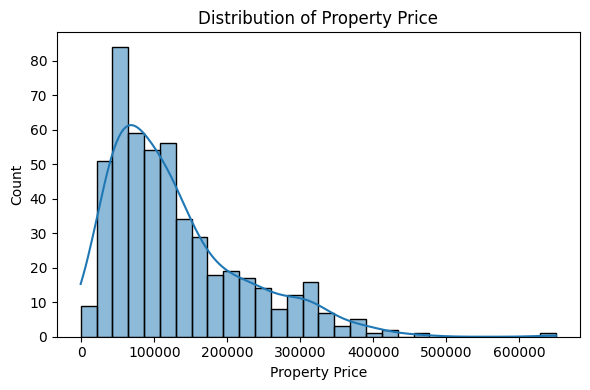

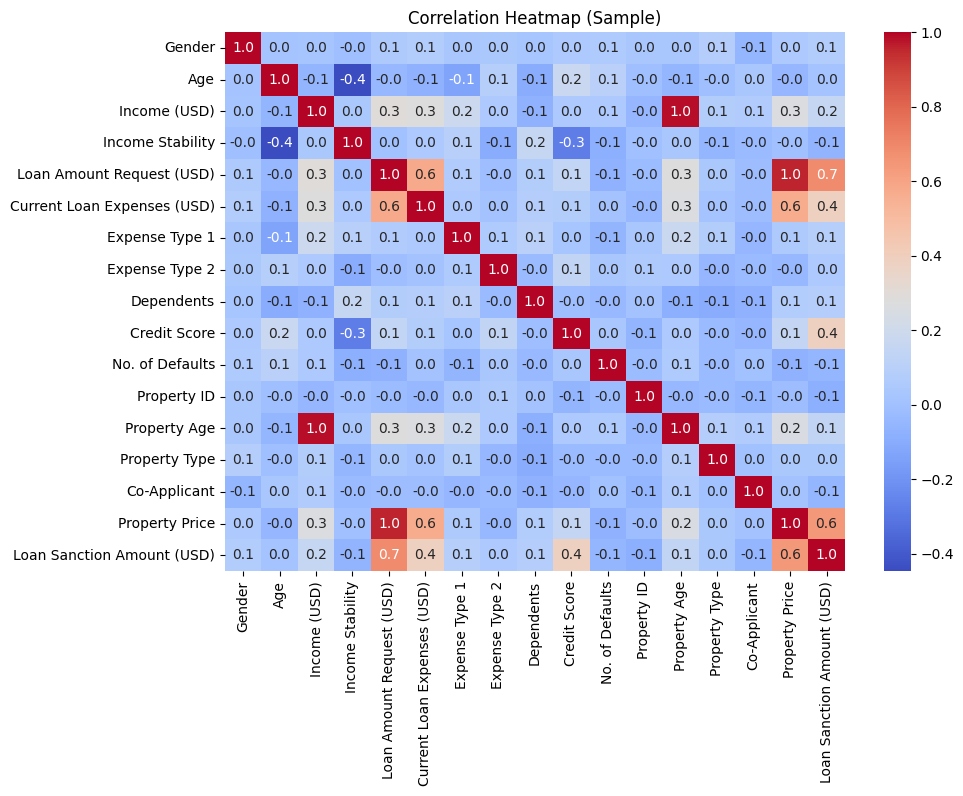

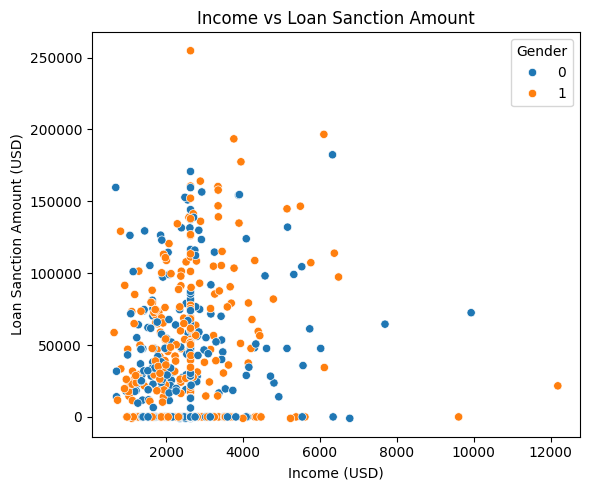

Gender                       0
Age                          0
Income (USD)                 0
Income Stability             0
Loan Amount Request (USD)    0
                            ..
Property Location_Urban      0
Debt_Income_Ratio            0
Loan_Property_Ratio          0
Age_Group                    0
First_Loan                   0
Length: 60049, dtype: int64


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample the data to prevent memory crash
df_sample = df.sample(n=500, random_state=1) if len(df) > 500 else df.copy()

# 1. Missing Values Heatmap
plt.figure(figsize=(12, 5))
sns.heatmap(df_sample.isnull(), cbar=False, cmap='coolwarm')
plt.title('Missing Values (Sample)')
plt.show()

# 2. Count plots for categorical features
categorical_cols = ['Gender', 'Income Stability', 'Type of Employment', 'Co-Applicant']
for col in categorical_cols:
    if col in df_sample.columns:
        plt.figure(figsize=(6, 4))
        sns.countplot(data=df_sample, x=col)
        plt.title(f'Count of {col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# 3. Histograms for numerical features
numerical_cols = ['Income (USD)', 'Age', 'Loan Amount Request (USD)',
                  'Loan Sanction Amount (USD)', 'Current Loan Expenses (USD)',
                  'Credit Score', 'No. of Defaults', 'Property Age', 'Property Price']
for col in numerical_cols:
    if col in df_sample.columns:
        plt.figure(figsize=(6, 4))
        sns.histplot(df_sample[col].dropna(), kde=True, bins=30)
        plt.title(f'Distribution of {col}')
        plt.tight_layout()
        plt.show()

# 4. Correlation Heatmap
plt.figure(figsize=(10, 7))
corr_matrix = df_sample.select_dtypes(include='number').corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title("Correlation Heatmap (Sample)")
plt.show()

# 5. Scatter plot between Income and Loan Sanction Amount
if 'Income (USD)' in df_sample.columns and 'Loan Sanction Amount (USD)' in df_sample.columns:
    plt.figure(figsize=(6, 5))
    sns.scatterplot(data=df_sample, x='Income (USD)', y='Loan Sanction Amount (USD)', hue='Gender')
    plt.title("Income vs Loan Sanction Amount")
    plt.tight_layout()
    plt.show()

# Debt to Income Ratio
df['Debt_Income_Ratio'] = df['Current Loan Expenses (USD)'] / df['Income (USD)']

# Loan to Property Value Ratio
df['Loan_Property_Ratio'] = df['Loan Amount Request (USD)'] / df['Property Price']

# Age Bucket (Young, Middle-aged, Senior)
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 25, 45, 100], labels=['Young', 'Middle-aged', 'Senior'])

# Is First Loan (based on defaults)
df['First_Loan'] = df['No. of Defaults'].apply(lambda x: 1 if x == 0 else 0)

print(df.isnull().sum())

In [17]:
from sklearn.model_selection import train_test_split

# First split: train (70%) and temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.30, random_state=42)

# Second split: validation (15%) and test (15%) from temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Test set size:", X_test.shape)

Training set size: (21000, 16)
Validation set size: (4500, 16)
Test set size: (4500, 16)


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Evaluate on validation set
y_val_pred = lr_model.predict(X_val)
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print("Validation MSE:", mse)
print("Validation R² Score:", r2)

Validation MSE: 944830459.9131545
Validation R² Score: 0.5826244730415212


In [20]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# ---------- Evaluation on Validation Set ----------
y_val_pred = lr_model.predict(X_val)

mse_val = mean_squared_error(y_val, y_val_pred)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val, y_val_pred)

print("Validation Set Evaluation:")
print("MSE:", mse_val)
print("RMSE:", rmse_val)
print("R² Score:", r2_val)

# ---------- Evaluation on Test Set ----------
y_test_pred = lr_model.predict(X_test)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print("\nTest Set Evaluation:")
print("MSE:", mse_test)
print("RMSE:", rmse_test)
print("R² Score:", r2_test)

Validation Set Evaluation:
MSE: 944830459.9131545
RMSE: 30738.094604466856
R² Score: 0.5826244730415212

Test Set Evaluation:
MSE: 973168058.3638414
RMSE: 31195.64165654942
R² Score: 0.5681559092074029


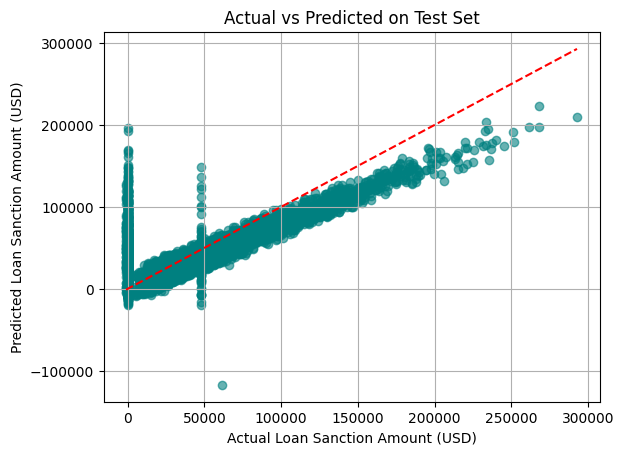

In [21]:

import matplotlib.pyplot as plt

plt.scatter(y_test, y_test_pred, alpha=0.6, color='teal')
plt.xlabel("Actual Loan Sanction Amount (USD)")
plt.ylabel("Predicted Loan Sanction Amount (USD)")
plt.title("Actual vs Predicted on Test Set")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.show()


<Figure size 1000x600 with 0 Axes>

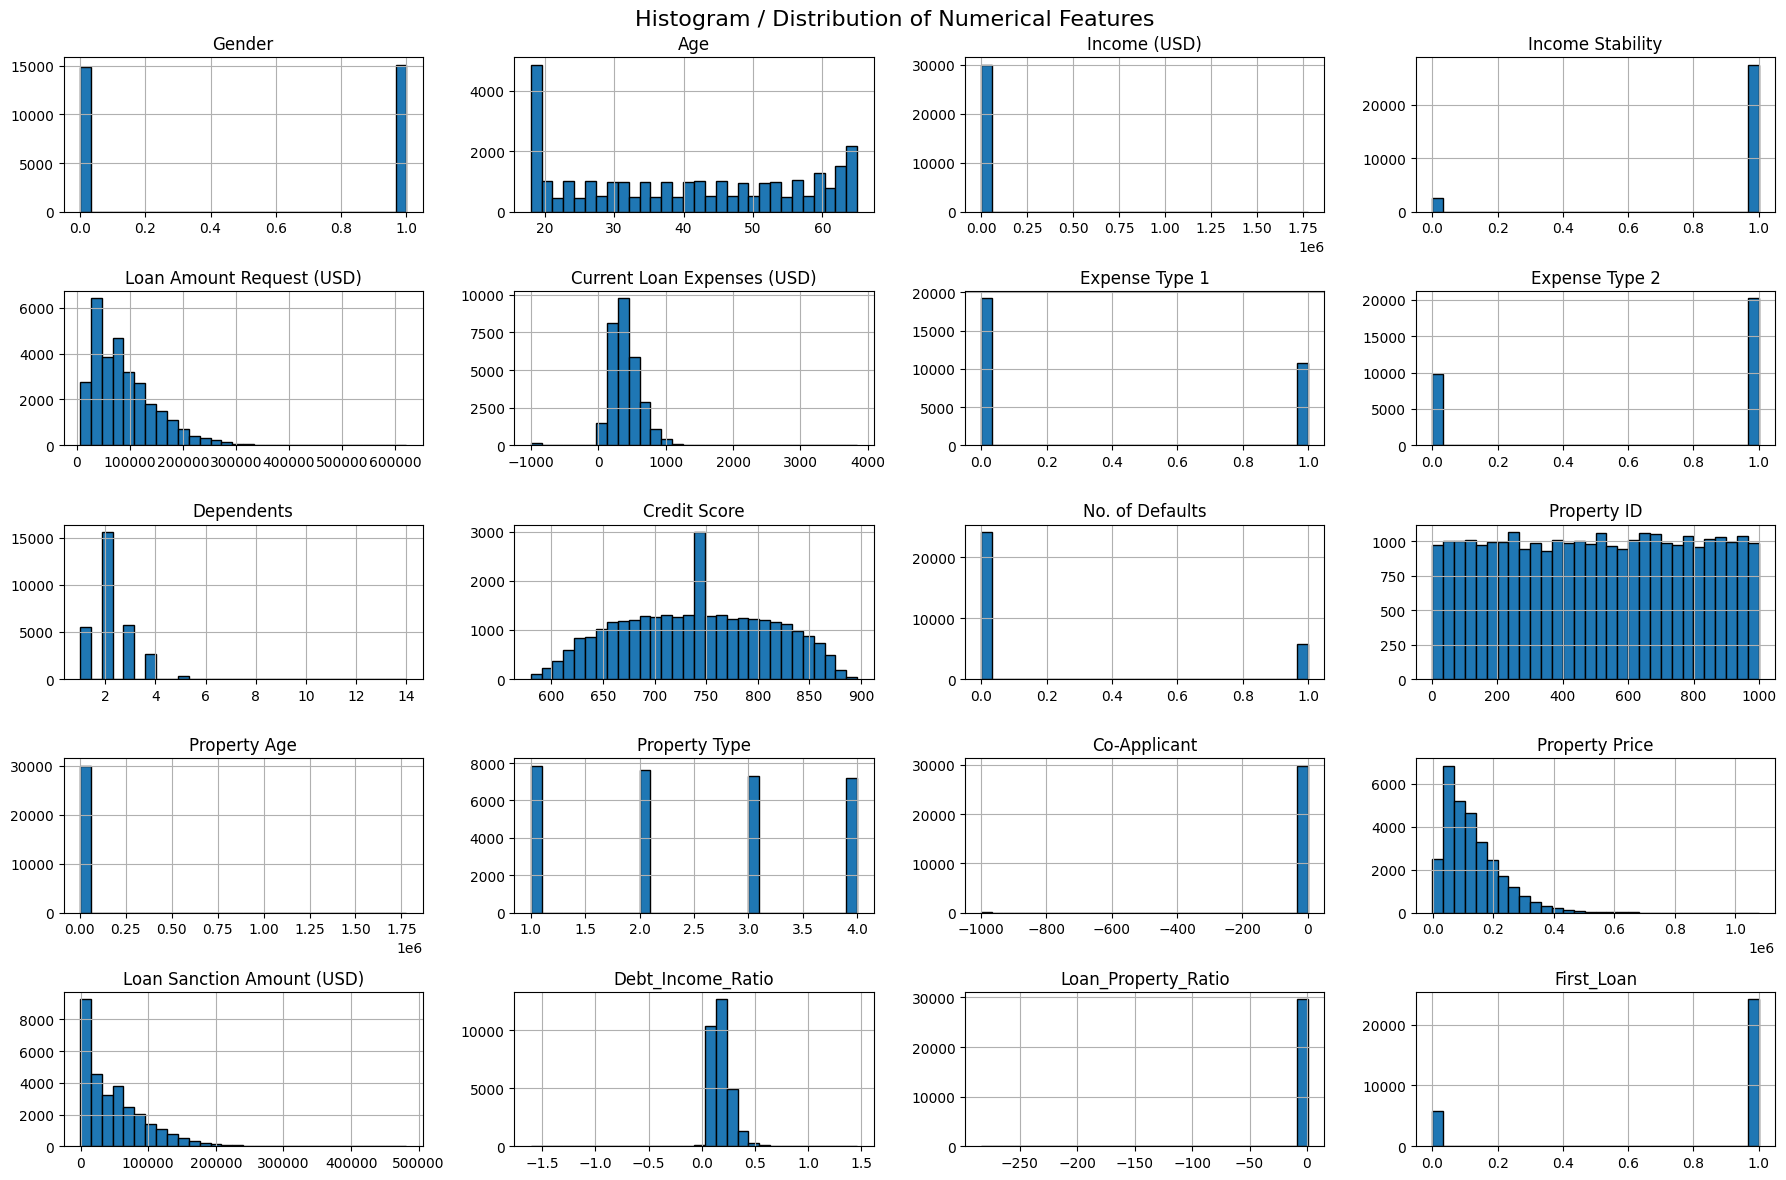

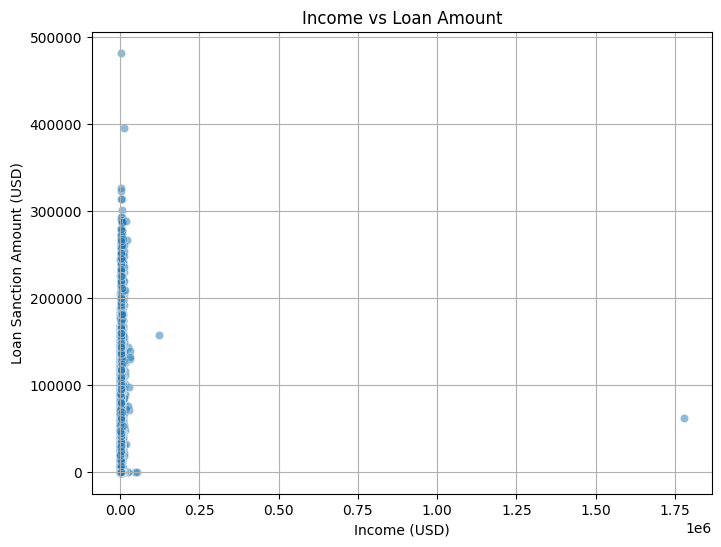

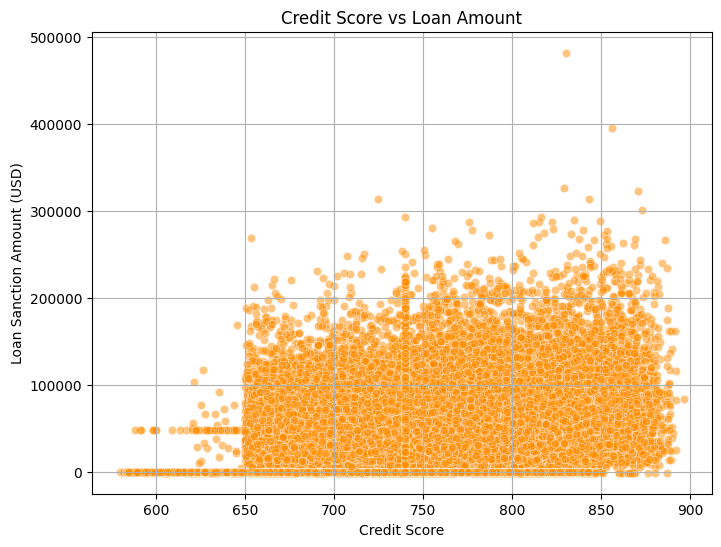

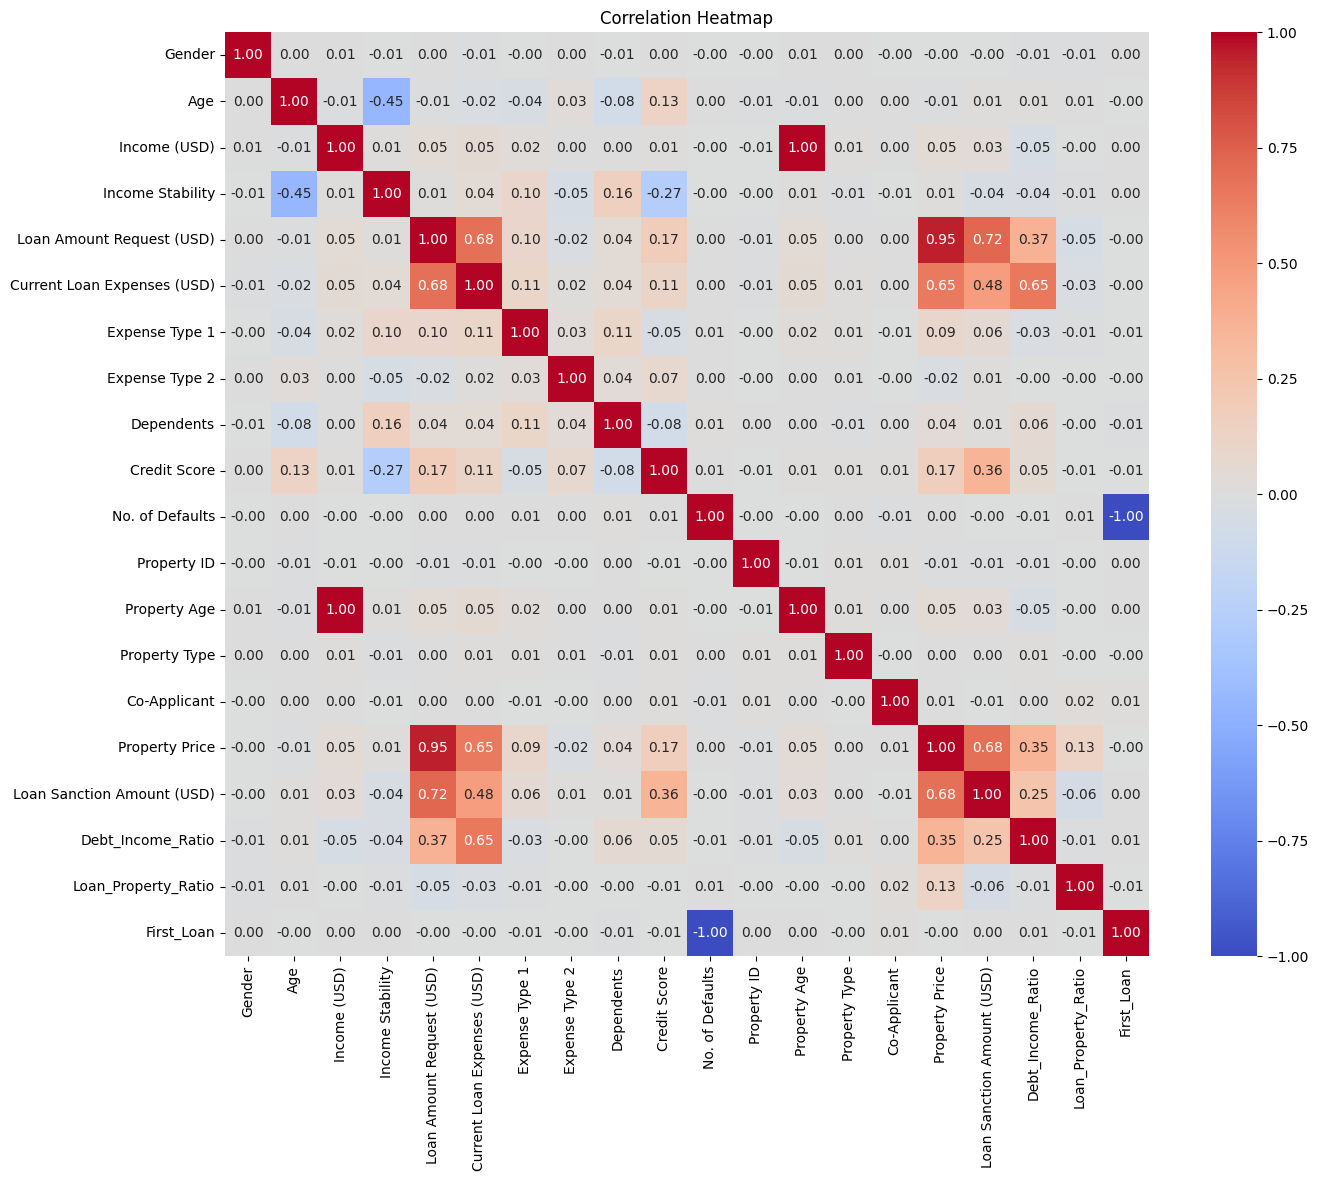

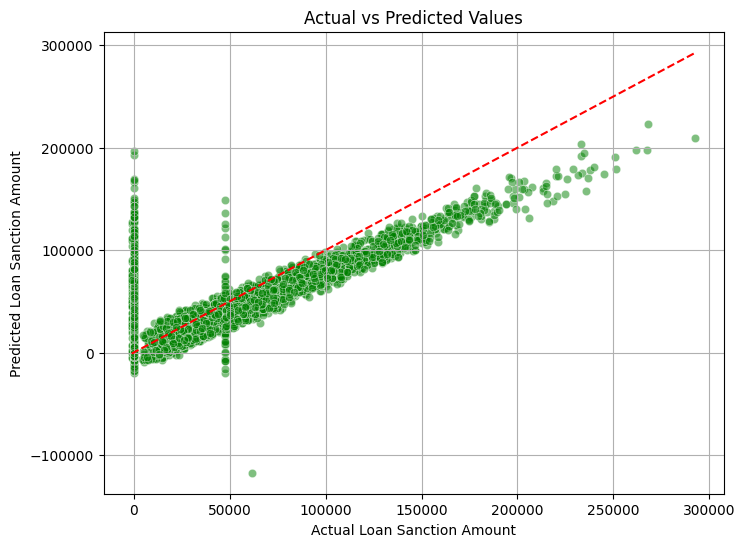

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Make plots more readable

plt.figure(figsize=(10, 6))

# -------------------------------
# 1. Histogram / Distribution Plots
# -------------------------------
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

df[numerical_cols].hist(figsize=(18, 12), bins=30, edgecolor='black')
plt.suptitle("Histogram / Distribution of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

# -------------------------------
# 2. Scatter Plots
# -------------------------------
# Example 1: Income vs Loan Amount
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income (USD)', y='Loan Sanction Amount (USD)', data=df, alpha=0.5)
plt.title("Income vs Loan Amount")
plt.grid(True)
plt.show()

# Example 2: Credit Score vs Loan Amount
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Credit Score', y='Loan Sanction Amount (USD)', data=df, alpha=0.5, color='darkorange')
plt.title("Credit Score vs Loan Amount")
plt.grid(True)
plt.show()

# -------------------------------
# 3. Correlation Heatmap
# -------------------------------
plt.figure(figsize=(16, 12))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()

# -------------------------------
# 4. Actual vs Predicted Plot
# -------------------------------
y_test_pred = lr_model.predict(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.xlabel("Actual Loan Sanction Amount")
plt.ylabel("Predicted Loan Sanction Amount")
plt.title("Actual vs Predicted Values")
plt.grid(True)
plt.show()

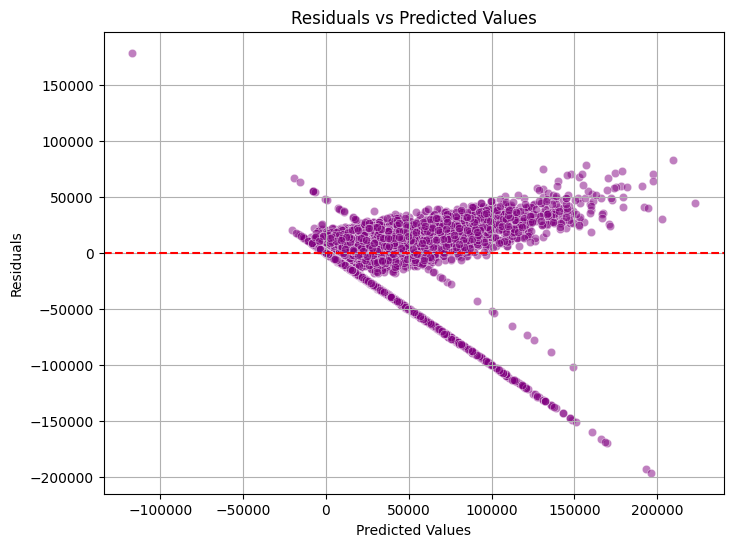

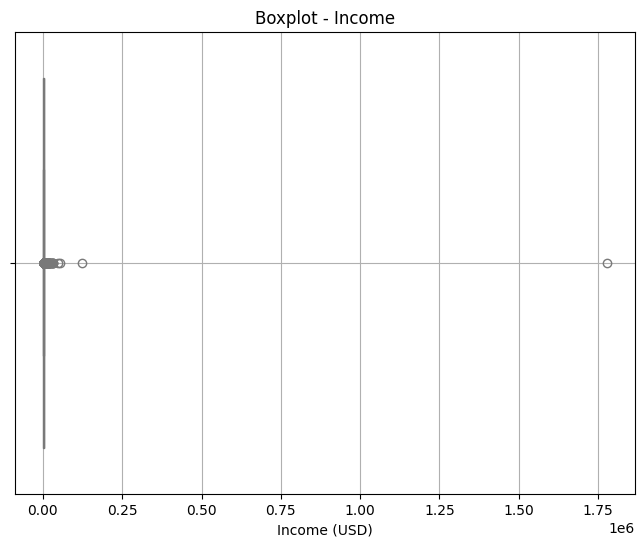

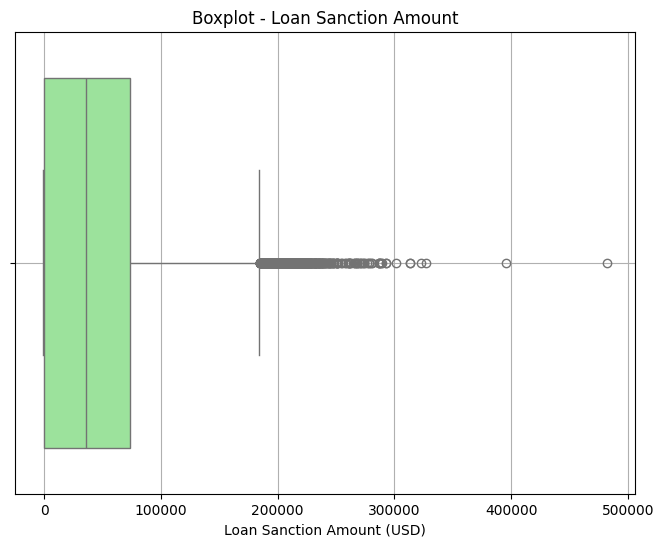

In [25]:
# -------------------------------
# 5. Residual Plot
# -------------------------------
residuals = y_test - y_test_pred

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_pred, y=residuals, alpha=0.5, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.grid(True)
plt.show()

# -------------------------------
# 6. Boxplots to Find Outliers
# -------------------------------
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Income (USD)'], color='lightblue')
plt.title("Boxplot - Income")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Loan Sanction Amount (USD)'], color='lightgreen')
plt.title("Boxplot - Loan Sanction Amount")
plt.grid(True)
plt.show()


In [29]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import numpy as np

# Assuming you already have X_scaled and y available
kf = KFold(n_splits=5, shuffle=True, random_state=42)
lr_model = LinearRegression()

fold_results = []

for fold, (train_index, test_index) in enumerate(kf.split(X_scaled), start=1):
    # Using numpy slicing directly to create train/test sets
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train model
    lr_model.fit(X_train, y_train)

    # Predict
    y_pred = lr_model.predict(X_test)

    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"\n----- Fold {fold} -----")
    print(f"MAE : {mae:.2f}")
    print(f"MSE : {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²  : {r2:.4f}")

    fold_results.append({
        'Fold': fold,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    })

# Average results
avg_mae = np.mean([f['MAE'] for f in fold_results])
avg_mse = np.mean([f['MSE'] for f in fold_results])
avg_rmse = np.mean([f['RMSE'] for f in fold_results])
avg_r2 = np.mean([f['R2'] for f in fold_results])

print("\nAverage Results over all Folds:")
print(f"Average MAE: {avg_mae:.2f}")
print(f"Average MSE: {avg_mse:.2f}")
print(f"Average RMSE: {avg_rmse:.2f}")
print(f"Average R²: {avg_r2:.4f}")



----- Fold 1 -----
MAE : 21713.16
MSE : 980739992.60
RMSE: 31316.77
R²  : 0.5734

----- Fold 2 -----
MAE : 21870.37
MSE : 979580662.48
RMSE: 31298.25
R²  : 0.5688

----- Fold 3 -----
MAE : 22363.99
MSE : 1064191854.08
RMSE: 32621.95
R²  : 0.5403

----- Fold 4 -----
MAE : 21757.43
MSE : 993204913.55
RMSE: 31515.15
R²  : 0.5776

----- Fold 5 -----
MAE : 21003.66
MSE : 879572513.81
RMSE: 29657.59
R²  : 0.6104

Average Results over all Folds:
Average MAE: 21741.72
Average MSE: 979457987.30
Average RMSE: 31281.94
Average R²: 0.5741
